In [11]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def delimited_lempel_ziv_complexity(sequence, delimiter):
   
    sub_strings = set()
    n = len(sequence)

    ind = 0
    inc = 1
    while True:
        if ind + inc > len(sequence):
            break
        sub_str = sequence[ind : ind + inc]
        if delimiter in sub_str: 
            ind = ind + 1
            inc = 1
        else:
            if sub_str in sub_strings:
                inc += 1
       
            else:
                sub_strings.add(sub_str)
                ind = ind + 1
                inc = 1
    return len(sub_strings)





In [55]:
import os
import sys

#inserire il path dell'output
path = "C:/Users/Leon/Desktop/Data/Output"

#inserire il path target dove salvare i plot
target = "C:/Users/Leon/Desctop/Data/PLOT"


filepaths = [path]
arrayfiles = []
for root,dir,files in os.walk(os.path.normpath(path), topdown=True):
    if len(files) > 0:
        for file in files:
            filepaths.append(os.path.join(root,file).replace("\\","/"))
            arrayfiles.append(file)
filepaths.remove("C:/Users/Leon/Desktop/Data/Output")
len(filepaths)

18

C:/Users/Leon/Desctop/Data/PLOT0.png


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Leon/Desctop/Data/PLOT/prova.png'

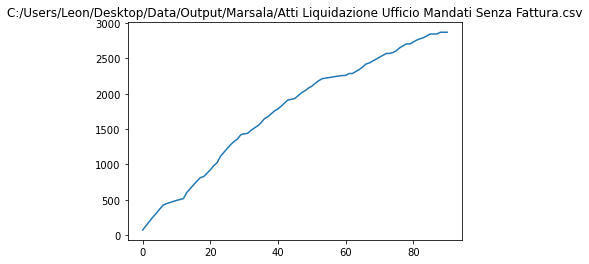

In [69]:
count = 0
for log in filepaths:
    df=pd.read_csv(log, encoding='ISO-8859-1', on_bad_lines='skip')
    
    df

    df1 = df[['id istanza','renamed']]
    
    df2=df1.groupby("id istanza")["renamed"].sum().reset_index()
    vec1 = []
    for i in range(len(df2)):
        join='*'.join(df2.loc[0:i,'renamed'])
        unique_complexity=delimited_lempel_ziv_complexity(join, "*")
        vec1.append(unique_complexity)
    
    import matplotlib.pyplot as plt
    plt.plot(vec1)
    plt.title(log)

    print(target + str(count) + ".png")

    plt.savefig("C:/Users/Leon/Desctop/Data/PLOT/prova.png")
    count = count + 1
    

    plt.clf()
    break

In [36]:
#df1

Text(0.5, 1.0, 'plot')

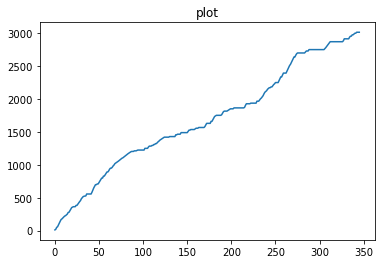